In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data = pd.read_csv('data.csv')

data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
data = data.drop(['Date'], axis=1)

In [10]:
correlation = data.corr()

<Axes: >

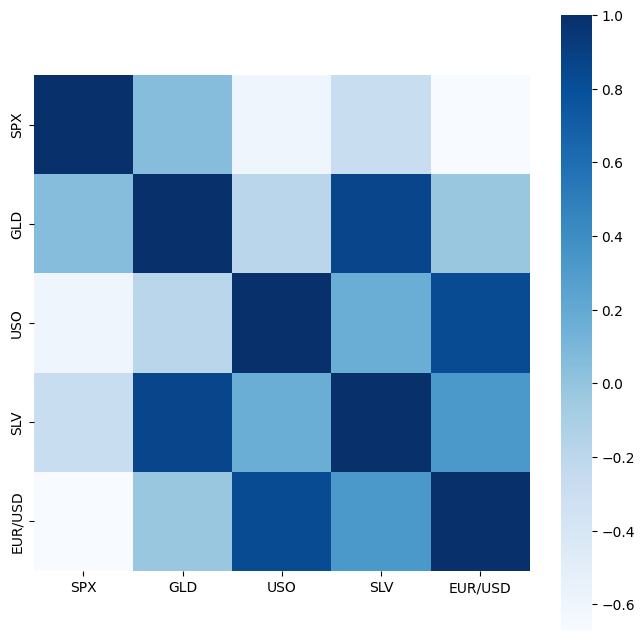

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot_kws={'size': 8}, cmap='Blues')

In [13]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

--> Splitting the dependent and independent variables

In [14]:
X = data.drop(['GLD'], axis = 1)

Y = data['GLD']

In [15]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

--> Splitting into training and testing data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

--> Model Training

In [18]:
model = RandomForestRegressor(n_estimators=100)

In [19]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
test_data_prediction = model.predict(X_test)

In [21]:
error_score_testing = metrics.r2_score(Y_test, test_data_prediction)

error_score_testing

0.9886394949654121

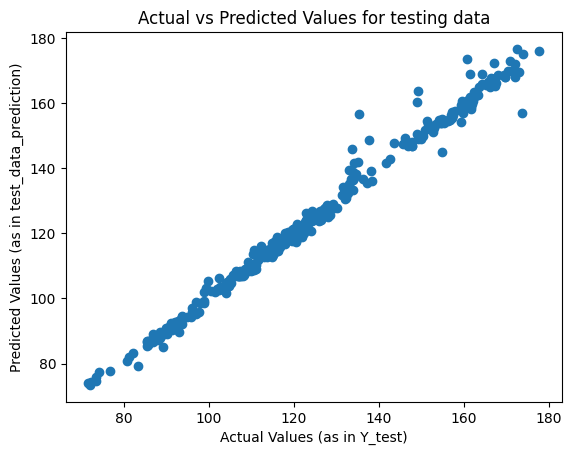

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Values (as in Y_test)')
plt.ylabel('Predicted Values (as in test_data_prediction)')
plt.title('Actual vs Predicted Values for testing data')
plt.show()

In [23]:
y_test_list = list(Y_test)

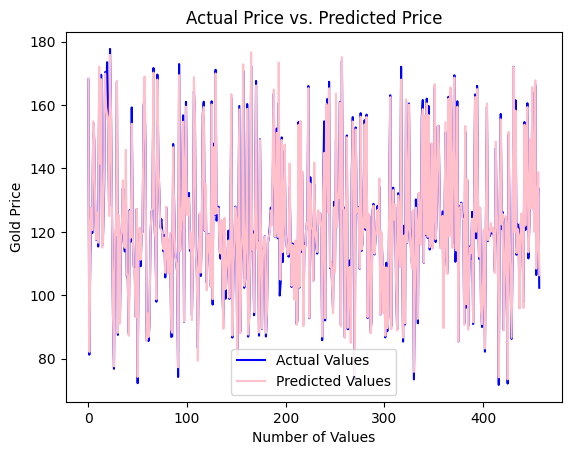

In [24]:
plt.plot(y_test_list, color='blue', label='Actual Values')
plt.plot(test_data_prediction, color='pink', label='Predicted Values')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()